In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
import seaborn as sns
%matplotlib inline
sns.set()

### Carga de datos 

In [2]:
df = pd.read_parquet('filtered_files/parquet/git_final_parquet')

Ignoring path: filtered_files/parquet/git_final_parquet\_SUCCESS


In [3]:
df.size = pd.to_numeric(df['size'])
df.time = pd.to_datetime(df.time)
df.set_index('time', inplace=True) # Marco la fecha como indice
display(df.dtypes)
display(df.describe())
display(df.head())

repo_base_lang    object
size               int64
dtype: object

,size
count,971396.000000
mean,41.369921
std,114.942896
min,0.000000
25%,2.000000
50%,9.000000
75%,29.000000
max,1000.000000


,repo_base_lang,size
time,,
2017-08-20,JavaScript,1
2015-08-25,C++,2
2017-08-26,PHP,6
2017-11-25,JavaScript,2
2017-09-22,JavaScript,14


In [4]:
group = df.groupby([pd.Grouper(freq='M'), 'repo_base_lang']).sum()
pivoted = pd.pivot_table(group, index='time',columns='repo_base_lang',values='size', aggfunc='sum', fill_value=0)

In [5]:
top2017 = df[df.index >= '2017'].groupby('repo_base_lang').sum().nlargest(20, 'size')
top2016 = df[(df.index >= '2016') & (df.index <= '2017')].groupby('repo_base_lang').sum().nlargest(20, 'size')

In [19]:
cols = ['JavaScript', 'Java', 'Python', 'C++', 'C', 'PHP', 'HTML', 'Ruby', 'Go',
       'C#', 'CSS', 'Shell', 'TypeScript', 'DM', 'Scala', 'Rust', 'Makefile',
       'PowerShell', 'Objective-C', 'Kotlin']

In [7]:
pivoted.index

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', name='time', freq='M')

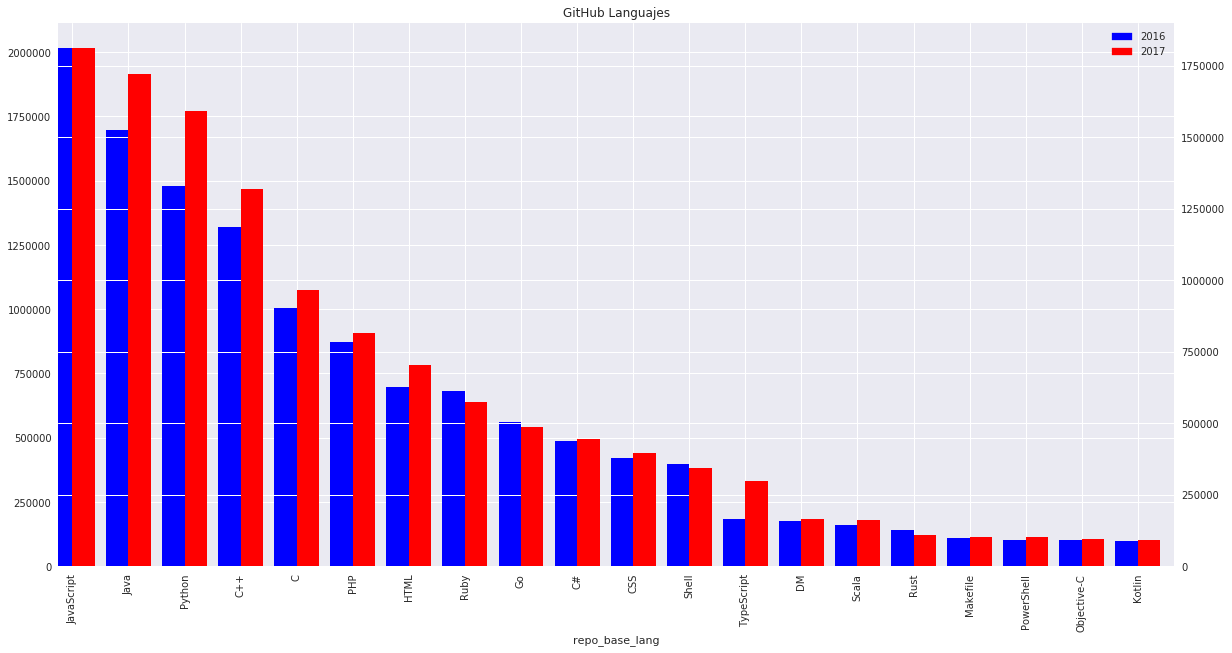

In [93]:
red_patch = mpatches.Patch(color='blue', label='2016')
blue_patch = mpatches.Patch(color='red', label='2017')
width = 0.4

fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()

top2016.plot.bar(color='blue', ax=ax, width=width, position=1, legend=False)
top2017.plot.bar(color='red', ax=ax2, width=width, position=0, legend=False)

plt.title('GitHub Languajes')
plt.legend(handles=[red_patch, blue_patch])
plt.show()


In [9]:
df2017 = df[df.index >= '2017'].groupby('repo_base_lang').sum()
df2016 = df[df.index >= '2016'].groupby('repo_base_lang').sum()
df2015 = df[df.index >= '2015'].groupby('repo_base_lang').sum()
diferencia = df2017.subtract(df2015, axis='index')

df2015.columns = ['2015']
df2016.columns = ['2016']
df2017.columns = ['2017']
diferencia.columns = ['diff']

In [10]:
diff = df2015.join(df2016).join(df2017)

In [62]:
# diff.to_csv('github.csv')
diff.nlargest(20, '2017')

,2015,2016,2017
repo_base_lang,,,
JavaScript,4884167,3505168.0,1810425.0
Java,5455064,3733100.0,1721017.0
Python,4431297,3070357.0,1590943.0
C++,3815534,2635039.0,1317110.0
C,2788899,1965547.0,966323.0
PHP,2417759,1687405.0,816470.0
HTML,1860431,1383307.0,701946.0
Ruby,1886920,1269719.0,574243.0
Go,1533593,1046067.0,486727.0


In [91]:
lang = 'Java'
strformat = "{:^10}|{:^10}|{:^10}|{:^10}"
print(strformat.format("2016", "2017", "16-17", "17-16"))
print("{:-<44}".format(""))
print(strformat.format(df2016.loc[lang][0], df2017.loc[lang][0], (df2016.loc[lang][0]-df2017.loc[lang][0]), (df2017.loc[lang][0]-df2016.loc[lang][0])))

   2016   |   2017   |  16-17   |  17-16   
--------------------------------------------
 3733100  | 1721017  | 2012083  | -2012083 


In [17]:
diff[diff['2017'] > 90000]

,2015,2016,2017
repo_base_lang,,,
C,2788899,1965547.0,966323.0
C#,1325830,929915.0,445058.0
C++,3815534,2635039.0,1317110.0
CSS,1082809,792647.0,395089.0
DM,443368,348893.0,164401.0
Go,1533593,1046067.0,486727.0
HTML,1860431,1383307.0,701946.0
Java,5455064,3733100.0,1721017.0
JavaScript,4884167,3505168.0,1810425.0


In [59]:
diff.sort_values(['2015'], ascending=False)

,2015,2016,2017
repo_base_lang,,,
Java,5455064,3733100.0,1721017.0
JavaScript,4884167,3505168.0,1810425.0
Python,4431297,3070357.0,1590943.0
C++,3815534,2635039.0,1317110.0
C,2788899,1965547.0,966323.0
PHP,2417759,1687405.0,816470.0
Ruby,1886920,1269719.0,574243.0
HTML,1860431,1383307.0,701946.0
Go,1533593,1046067.0,486727.0


# Only Pandas

In [6]:
df = pd.read_csv('github.csv', usecols=['repo_base_lang', 'size', 'time'])
df.time = df.time.map(lambda x: x[:7]) # Elimino el dato de los dias
df.time = pd.to_datetime(df.time) # Convierto la columna a tipo fecha
df.set_index('time', inplace=True) # Marco la fecha como indice
df.head(10)

,repo_base_lang,size
time,,
2016-02-01,Ruby,1
2016-02-01,HTML,1
2016-02-01,Ruby,1
2016-02-01,HTML,1
2016-02-01,Ruby,2
2016-02-01,HTML,2
2016-10-01,Ruby,1
2016-10-01,HTML,1
2016-09-01,Ruby,2


### Conseguir los 20 Tags más populares del último mes

In [7]:
lastMonth = '2017'
display(df[df.index >= lastMonth].groupby('repo_base_lang').sum().nlargest(20, 'size'))
display(df[df.index >= lastMonth].groupby('repo_base_lang').sum().nlargest(20, 'size').index)

,size
repo_base_lang,
JavaScript,35443
HTML,29555
Python,28726
Java,20071
C++,18535
C,10334
TypeScript,10084
CSS,9850
Kotlin,9832


Index(['JavaScript', 'HTML', 'Python', 'Java', 'C++', 'C', 'TypeScript', 'CSS',
       'Kotlin', 'PHP', 'Gettext Catalog', 'XML', 'Nix', 'Ruby', 'PowerShell',
       'GCC Machine Description', 'Go', 'Shell', 'LLVM', 'Swift'],
      dtype='object', name='repo_base_lang')

### Obtengo solo los lenguages requeridos

In [8]:
language_searched = ['JavaScript', 'C#' , 'Java' , 'Android' , 'Python' , 'C++' , 'PHP' , 'ios' , 'C' , 'HTML']
# language_searched =['JavaScript', 'Python', 'HTML', 'C++', 'Java', 'Kotlin', 'TypeScript', 'PHP','Go']
filteredList = df[df.repo_base_lang.isin(language_searched)]
filteredList.tail(5)

,repo_base_lang,size
time,,
2017-02-01,HTML,2
2017-03-01,HTML,3
2017-08-01,JavaScript,1
2017-11-01,JavaScript,10
2017-09-01,JavaScript,1


### Se reagrupan por fecha y lenguage

In [9]:
grouped = filteredList.groupby(['time', 'repo_base_lang']).sum()
grouped.head(10)

size
time       repo_base_lang       
2015-01-01 C                5561
           C#                590
           C++             13693
           HTML            16998
           Java             4441
           JavaScript      14806
           PHP              7163
           Python          19072
2015-02-01 C                3181
           C#               1220

### Se genera una columna para cada lenguage y se le asigna el valor del size

In [10]:
lang = grouped.unstack(fill_value=0)
lang.head(10)

size                                                    
repo_base_lang     C    C#    C++   HTML   Java JavaScript    PHP Python
time                                                                    
2015-01-01      5561   590  13693  16998   4441      14806   7163  19072
2015-02-01      3181  1220  10732  19789   8733      24033  11793  20928
2015-03-01      5717   636  14133  20709  11683      19088   8421  18426
2015-04-01      6981   640  17576  23277   8216      22280   8619  17581
2015-05-01      5282  1466   9067  17718  11533      15184   5233  20969

#  Gráfica

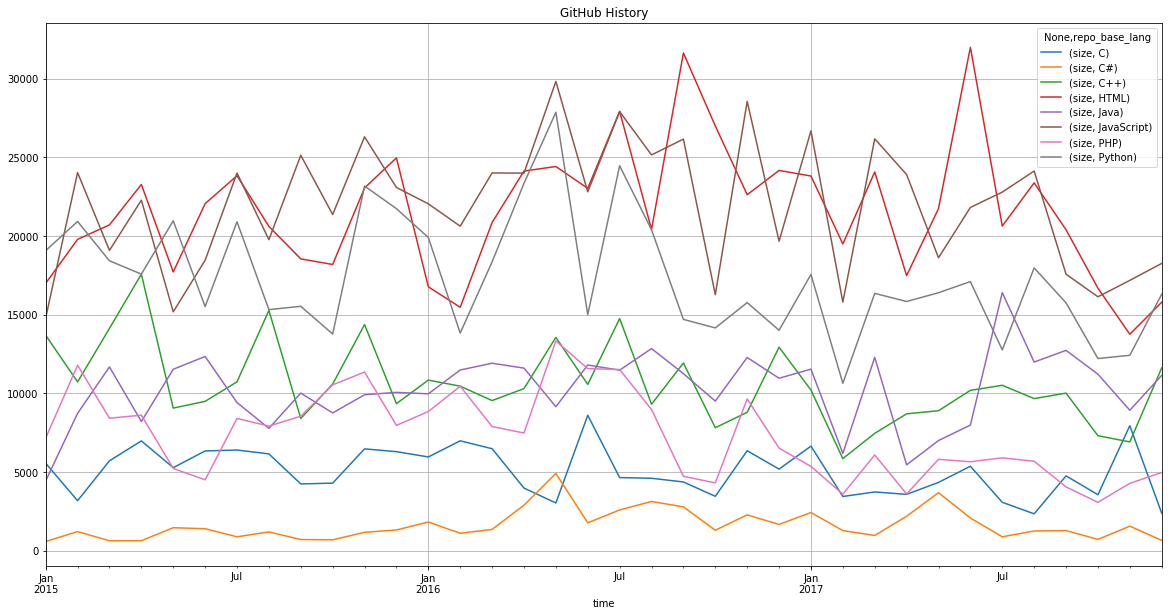

In [44]:
fig,b ax = plt.subplots(figsize=(20,10))
lang.plot(ax=ax, legend=True, title='GitHub History', grid=True)



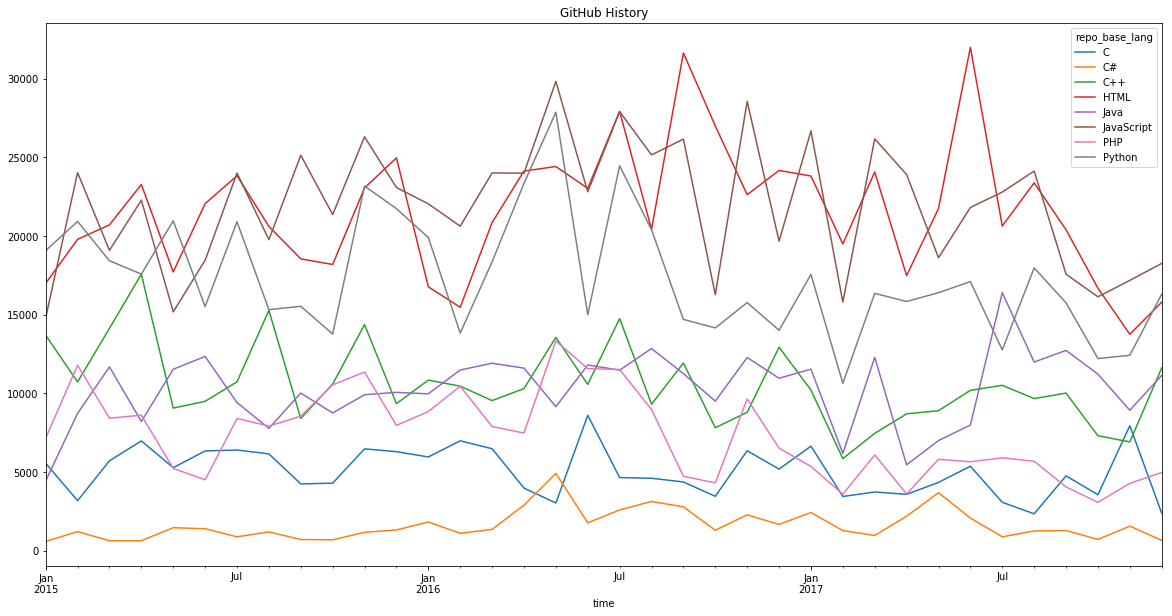

In [65]:
#df.pivot(index='time',columns='repo_base_lang', values='size')

fig, ax = plt.subplots(figsize=(20,10))
lang.plot(x=lang.index, y='size', ax=ax, legend=True, title='GitHub History', grid=False)
plt.savefig('/home/david/github_historical.png', transparent=True, format='png', dpi=fig.dpi)